# Pymaceuticals Inc.
---

### Analysis

-As seen in the box plot, Capomulin and Ramican have the smallest Final Tumor volume at the end of their treatment which implies that they are the most effective treatments but, it is important to note that Capomulin and Ramicane also has the longest observed mouse timepoint as shown in the bar graphs. This means that those treatments have had a longer time to take an effect on the tumor volume than the other treatments. Because of this, we may not know if the other treatments are as or more effective than Capomulin and Ramican because the observations for other treatments ended too early.

-The scatter plot with a regression line showing the relationship between weight and average tumor volume shows that as the weight of the mouse increases, the tumor volume increases which means bigger mice are at higher risk of large tumors than smaller mice.

-The line graph of the Capomulin treatment of Mouse l509 shows its tumor volume decreasing over several days. It shows that the treatment doesn’t have much of an effect until around day 20 and there are some spikes where the tumor volume grows before decreasing again.  It would be beneficial for a longitudinal study to be done to see the long term effects of the treatments and whether or not they can completely get rid of the tumor.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'left')

# Filter unique Mouse ID values and corresponding data
unique_df = data_df['Mouse ID'].unique()

# Display the unique_df DataFrame
unique_df

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [4]:
# Checking the number of mice.
num = len(unique_df)
print(num)

249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = data_df[data_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

# Display the duplicate mice
print(duplicate)

['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = data_df.loc[data_df['Mouse ID'] == 'g989']
dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_df = data_df.loc[data_df['Mouse ID'] != 'g989']
unique_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_num = len(unique_df['Mouse ID'].unique())
clean_num

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', st.sem])
summary_df.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.','sem': 'Tumor Volume Std. Err.'}, inplace=True)
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', st.sem])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

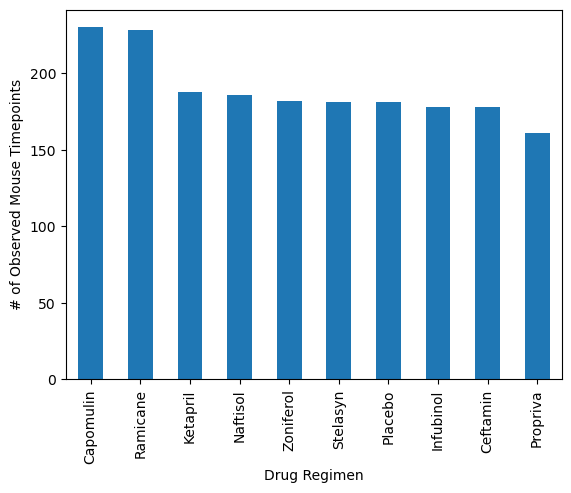

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = data_df['Drug Regimen'].value_counts()
count.plot(kind = 'bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

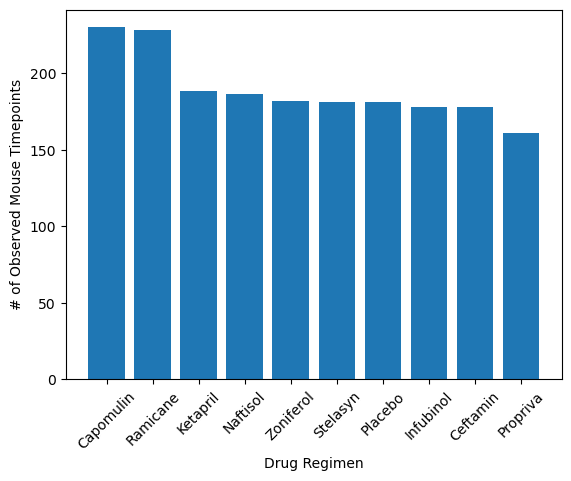

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = data_df['Drug Regimen'].value_counts()
Drug_regimen = counts.index
plt.bar(Drug_regimen, counts)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

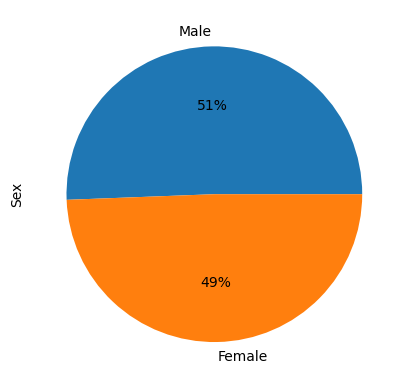

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = data_df['Sex'].value_counts()
labels = sex_count.index
sex_count.plot(kind ='pie', autopct='%1.0f%%')
plt.show()

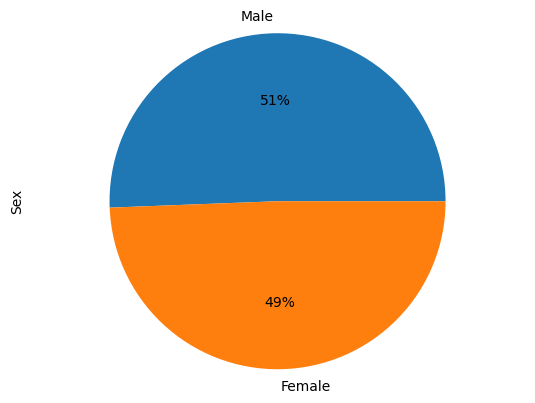

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = data_df['Sex'].value_counts()
labels = sex_count.index
sex = sex_count.values
plt.pie(sex, labels = labels, autopct = '%1.0f%%')
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = last_timepoint.merge(data_df,on=['Mouse ID', 'Timepoint'], how = 'left')
merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    tumour_volumes = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    vol_data.append(tumour_volumes)
    
    # add subset 
    quartiles = tumour_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumour_volumes.loc[(tumour_volumes < lower_bound) | (tumour_volumes > upper_bound)]
    if outliers.any():
        print (f"Potential outliers for {drug}: {outliers}")
    else:
        print (f'There are no potential outliers for {drug}')

There are no potential outliers for Capomulin
There are no potential outliers for Ramicane
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
There are no potential outliers for Ceftamin


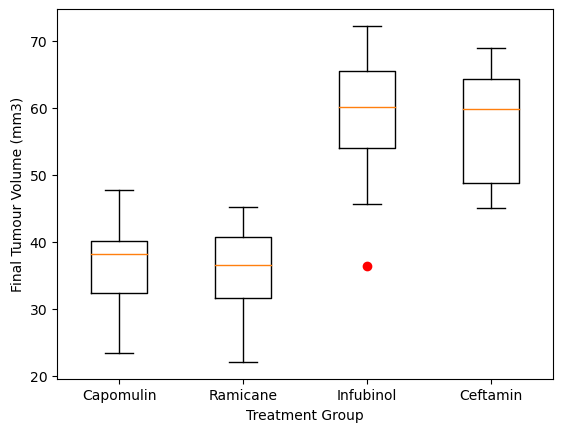

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(vol_data, sym='ro')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.set_ylabel('Final Tumour Volume (mm3)')
ax1.set_xlabel('Treatment Group')
plt.show()

## Line and Scatter Plots

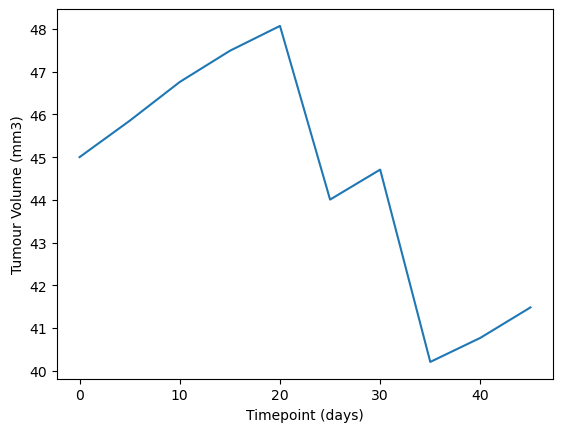

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Mice treated with Capomulin
capomulin_mouse = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
#Data for only One Mouse ID
l509_mouse = data_df.loc[data_df['Mouse ID'] == 'l509']
l509_mouse
#Assign X and Y values
x_axis = l509_mouse['Timepoint']
y_axis = l509_mouse['Tumor Volume (mm3)']
#Plot and label
plt.plot(x_axis, y_axis)
plt.ylabel('Tumour Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

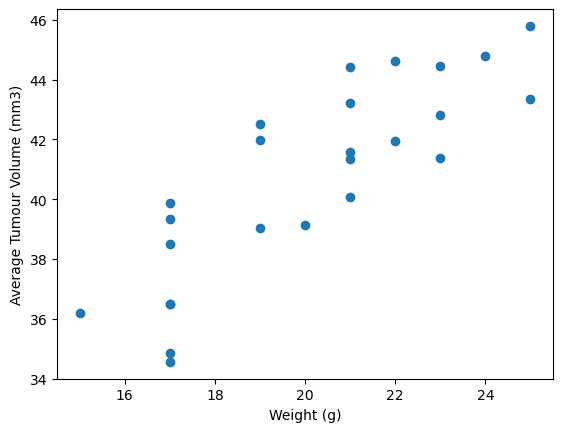

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mouse
#Find Average Tumour volume per mouse
avg_tumour_vol = capomulin_mouse.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#Find average weight per Mouse
mouse_weight = capomulin_mouse.groupby('Mouse ID')['Weight (g)'].mean()

#Assign X and Y values
xaxis = mouse_weight
yaxis = avg_tumour_vol

#PLot and label
plt.scatter(xaxis, yaxis, marker = 'o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.show

## Correlation and Regression

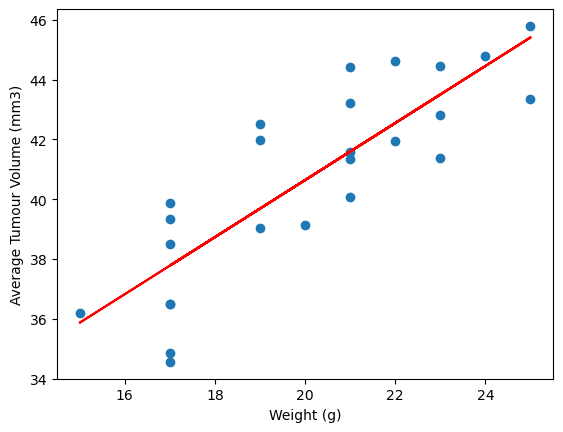

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis*slope + intercept
plt.scatter(xaxis, yaxis)
plt.plot(xaxis, regress_values, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.show()